# Text Analytics Project - Texas Senate Elections 2018

### Twitter Scrapping

In [1]:
#!/usr/bin/python2.7
# change keywords in line 82; this script will fecth 3000 tweets
# if you get no module named oauth2, install with pip2.7 install --user oauth2
# the tweets will be written in a file tweets.csv
# make sure you change the outout file name when you run this script multiple timees.
import oauth2 as oauth
import csv
from csv import writer
import json
import time
import urllib.request as urllib   #For Python 2 use import urllib2, for python3 use urllib.request
import re
import tweepy
import csv
import json
import pandas as pd
import datetime

In [2]:
# create a dictionary to store your twitter credentials

twitter_cred = dict()

# Enter your own consumer_key, consumer_secret, access_key and access_secret
# Replacing the stars ("********")

twitter_cred['CONSUMER_KEY'] = 'AyNfe4476aIAtDsufnrHl39fd'
twitter_cred['CONSUMER_SECRET'] = 'T2gXgAFuDNW696IDZjlsAHypLiDjuOnHcPNUwcXfQsH7sTNxtD'
twitter_cred['ACCESS_KEY'] = '320204996-ZgXeu5ov5KhVYY94X04E5G2UfrnJyHIbZPlGeuXQ'
twitter_cred['ACCESS_SECRET'] = 'KWyJkadoUMAo19MrN5A3jp7vSRjkVhnzKSJtYhOxaI8ke'

# Save the information to a json so that it can be reused in code without exposing
# the secret info to public

with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)

In [3]:
# Twitter API credentials

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']


In [4]:
# Create the api endpoint

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [5]:
limit = 4000
query=['Beto','Cruz']
tweets_list = []
# for tweet in tweepy.Cursor(api.search, q=query).items(limit):
#     tweets_list.append(tweet)
for tweet in tweepy.Cursor(api.search,q=query,since='2018-10-16',until='2018-10-23').items(limit): #,since='2018-10-16',until='2018-10-23'
    tweets_list.append(tweet)
#fetched_tweets = tweepy.Cursor(api.search, q=query).items(limit)

In [6]:
len(tweets_list)

3538

In [7]:
def populate_tweet_df(tweets):
#Create an empty dataframe
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['text'] = list(map(lambda tweet: tweet.text, tweets))
    df['retweeted'] = list(map(lambda tweet: tweet.retweeted, tweets))
    df['place'] = list(map(lambda tweet: tweet.user.location, tweets))
    df['screen_name'] = list(map(lambda tweet: tweet.user.screen_name,tweets))
    df['verified_user'] = list(map(lambda tweet: tweet.user.verified,tweets))
    df['followers_count'] = list(map(lambda tweet: tweet.user.followers_count, tweets))
    df['friends_count'] = list(map(lambda tweet: tweet.user.friends_count,tweets))
   # df['friendship_coeff'] = list(map(lambda tweet: float(tweet.user.followers_count)/float(tweet.user.friends_count), tweets))
    return df


In [8]:
df = populate_tweet_df(tweets_list)
print (df.head(10))

                    id                                               text  \
0  1116389926344458240  @RRRoro @moonlitwomyn1 @raising_hill @wismiss3...   
1  1116387843591393280  RT @laughingcat2016: @ghostinxbieber @NightlyP...   
2  1116387601492185089  @ghostinxbieber @NightlyPolitics @Well1la Beto...   
3  1116386498063024130  RT @TeenVogue: "I was once thirsty for a tall ...   
4  1116383626994778113  @ntvnyr173 I donated to Cruz\nseveral hundred ...   
5  1116383517217308672  @ntvnyr173 In spite of full on court press by ...   
6  1116377890445234178  RT @lkrichardson: @Teri_Kanefield Suggestions:...   
7  1116374160274444288  RT @lkrichardson: @Teri_Kanefield Suggestions:...   
8  1116373116366802944  @BobolinkFan @m2254 @Tomtmjoe @SamsonDrake1 @S...   
9  1116372337002201089  @KB805 @m2254 @Tomtmjoe @SamsonDrake1 @Saintte...   

   retweeted             place      screen_name  verified_user  \
0      False                      TrashyLaneBoy          False   
1      False        

In [ ]:
df.to_csv('out.csv', sep='\t', encoding='utf-8')

## Data Analysis

In [1]:
import re
import pandas as pd
%pylab inline
from matplotlib import pyplot as plt
import nltk
nltk.download('punkt')

Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/richabathija/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from string import punctuation
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import sys
# !pip install vaderSentiment
# !{sys.executable} -m pip install gensim
# import pysentiment as ps
# !{sys.executable} -m pip install pysentiment
# nltk.download('vader_lexicon')

from nltk import sentiment
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import gensim
from gensim import corpora, models, similarities

In [3]:
df = pd.read_csv(r'out.csv')
df.columns = ['ID','Screen_Name','Followers','Retweet','InReplyTo','Favorite','Friends','Listed','Location','Text']

In [6]:
df['Location'].head(5)

0                   NaN
1    AMERICA, THE GREAT
2                   NaN
3            Texas, USA
4            Texas, USA
Name: Location, dtype: object

In [4]:
df['Location'].notnull().head(5)

0    False
1     True
2    False
3     True
4     True
Name: Location, dtype: bool

In [7]:
df_raw = df[df['Location'].notnull()].drop_duplicates()

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58805 entries, 1 to 218330
Data columns (total 10 columns):
ID             58805 non-null object
Screen_Name    58805 non-null object
Followers      58805 non-null object
Retweet        58805 non-null object
InReplyTo      58805 non-null object
Favorite       58805 non-null object
Friends        58805 non-null object
Listed         58805 non-null object
Location       58805 non-null object
Text           58805 non-null object
dtypes: object(10)
memory usage: 4.9+ MB


## A. Variable Creation & cleaning tweets

#### 1. Variable for Urban/City

In [9]:
citystr = 'houston|austin|san antonio|dallas|fort worth|dfw|atx|hou|htx|dtx|dal|el paso|corpus christi|\
sanantonio|fortworth|elpaso|laredo|arlington|plano|corpuschristi'

def findcities(s):
    urban = 0
    s=str(s).lower()
    citiesfound = re.findall(citystr,s)
    if len(citiesfound) > 0 :
        urban = 1
    return urban

In [10]:
df_raw.columns


Index(['ID', 'Screen_Name', 'Followers', 'Retweet', 'InReplyTo', 'Favorite',
       'Friends', 'Listed', 'Location', 'Text'],
      dtype='object')

In [15]:
df_raw.head()

ID      Screen_Name Followers Retweet InReplyTo Favorite Friends  \
1  8.17147E+17    PeterRosianul      8471      20      None        0    8580   
3     33529092       SandraTXAS    142485      20      None       22   44206   
4    731549497  heythereimabbey      1096   14160      None        0     924   
6  7.48839E+17      Writernan11       672    2632      None        0     141   
8   3490579037    JamesSaporito      1364    2632      None        0     897   

  Listed            Location  \
1     31  AMERICA, THE GREAT   
3    433          Texas, USA   
4      6          Texas, USA   
6      6      Tennessee, USA   
8     35            New York   

                                                Text  Urban  Texas  
1  RT @SandraTXAS: "Millions of American Christia...      0      0  
3  "Millions of American Christians, especially m...      0      1  
4  RT @BreannaWenke: Hi, I'm Junie B. Jones the B...      0      1  
6  RT @GartrellLinda: .The PRETEND HISPANIC Beto ...      0      0  
8  RT @GartrellLinda: .The PRETEND HISPANIC Beto ...      0      0

In [12]:
df_raw['Urban'] = 0
df_raw['Urban'] = df_raw['Location'].map(findcities)
df_raw['Urban'].sum()

6258

In [13]:
df_raw['Urban'].head(10)

1     0
3     0
4     0
6     0
8     0
10    1
11    1
12    0
13    0
14    0
Name: Urban, dtype: int64

#### 2. Variable for Texas

In [14]:
tx_places='houston|san antonio|dallas|austin|fort worth|el paso|arlington|corpus christi|plano|laredo|lubbock|garland|\
irving|amarillo|grand prairie|brownsville|pasadena|mckinney|mesquite|killeen|frisco|mcallen|waco|carrollton|midland|\
denton|abilene|beaumont|odessa|round rock|wichita falls|richardson|lewisville|tyler|pearland|college station|san angelo|\
allen|league city|sugar land|longview|mission|edinburg|bryan|baytown|pharr|conroe|temple|missouri city|flower mound|\
north richland hills|harlingen|victoria|new braunfels|cedar park|mansfield|rowlett|georgetown|port arthur|san marcos|\
pflugerville|euless|desoto|grapevine|galveston|bedford|cedar hill|texas city|wylie|haltom city|keller|rockwall|burleson|\
coppell|huntsville|duncanville|the colony|sherman|hurst|lancaster|friendswood|texarkana|weslaco|lufkin|schertz|san juan|\
del rio|la porte|nacogdoches|deer park|rosenberg|copperas cove|little elm|socorro|kyle|leander|farmers branch|waxahachie|\
cleburne|southlake|houston|austin|san antonio|dallas|fort worth|dfw|atx|hou|htx|dtx|dal|el paso|corpus christi|\
sanantonio|fortworth|elpaso|laredo|arlington|plano|corpuschristi'
def findtx(s):
    intexas = 0
    s=str(s).lower()
    tx1 = re.findall('tx',s)
    tx2 = re.findall('texas',s)
    allplacesfound = re.findall(tx_places,s)
    if len(tx1)>0 or len(tx2)>0 or len(allplacesfound)>0:
        intexas = 1 
    return intexas

df_raw['Texas'] = 0
df_raw['Texas'] = df_raw['Location'].map(findtx)
df_raw['Texas'].sum()

14412

#### 3. Variables for Candidates

In [16]:
tedcruz_names='ted cruz|ted|cruz|tedcruz'
beto_names='beto orourke|beto|orourke|betoorourke|rourke'
def findbeto(s):
    beto = 0
    s = str(s).lower()
    txt1 = re.findall(beto_names,s)
    
    if len(txt1) > 0:
        beto = 1
    return beto

df_raw['Beto'] = df_raw['Text'].map(findbeto)

def findcruz(s):
    cruz = 0
    s = str(s).lower()
    txt1 = re.findall(tedcruz_names,s)
    if len(txt1) > 0:
        cruz = 1
    return cruz
df_raw['Cruz'] = df_raw['Text'].map(findcruz)
print (df_raw['Beto'].sum())
print (df_raw['Cruz'].sum())

33744
34093


In [17]:
df_raw.head()

ID      Screen_Name Followers Retweet InReplyTo Favorite Friends  \
1  8.17147E+17    PeterRosianul      8471      20      None        0    8580   
3     33529092       SandraTXAS    142485      20      None       22   44206   
4    731549497  heythereimabbey      1096   14160      None        0     924   
6  7.48839E+17      Writernan11       672    2632      None        0     141   
8   3490579037    JamesSaporito      1364    2632      None        0     897   

  Listed            Location  \
1     31  AMERICA, THE GREAT   
3    433          Texas, USA   
4      6          Texas, USA   
6      6      Tennessee, USA   
8     35            New York   

                                                Text  Urban  Texas  Beto  Cruz  
1  RT @SandraTXAS: "Millions of American Christia...      0      0     0     0  
3  "Millions of American Christians, especially m...      0      1     0     0  
4  RT @BreannaWenke: Hi, I'm Junie B. Jones the B...      0      1     1     0  
6  RT @GartrellLinda: .The PRETEND HISPANIC Beto ...      0      0     1     0  
8  RT @GartrellLinda: .The PRETEND HISPANIC Beto ...      0      0     1     0

#### Clean tweets

In [23]:
def processTweet(tweet):
    
    if tweet.startswith("RT"):   ## which means its a retweet
        i = tweet.index(':')
        tweet = tweet[i+2:]
    
    tweet = tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    tweet = re.sub('([0-9]+)','', tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('&amp;', '', tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = tweet.strip('\'"')
    return tweet

df_raw['Text']=df_raw['Text'].map(processTweet)

In [24]:
df_raw.head()

ID      Screen_Name Followers Retweet InReplyTo Favorite Friends  \
1  8.17147E+17    PeterRosianul      8471      20      None        0    8580   
3     33529092       SandraTXAS    142485      20      None       22   44206   
4    731549497  heythereimabbey      1096   14160      None        0     924   
6  7.48839E+17      Writernan11       672    2632      None        0     141   
8   3490579037    JamesSaporito      1364    2632      None        0     897   

  Listed            Location  \
1     31  AMERICA, THE GREAT   
3    433          Texas, USA   
4      6          Texas, USA   
6      6      Tennessee, USA   
8     35            New York   

                                                Text  Urban  Texas  Beto  Cruz  
1  millions of american christians, especially mi...      0      0     0     0  
3  millions of american christians, especially mi...      0      1     0     0  
4  hi, i'm junie b. jones the b stands for 'beto ...      0      1     1     0  
6  .the pretend hispanic beto o'rourke tried to f...      0      0     1     0  
8  .the pretend hispanic beto o'rourke tried to f...      0      0     1     0

In [22]:
# This is just an example to understand re.sub() better
import re
text = "Python for beginner is a very cool website"
pattern = re.sub("cool", "good", text)
print(pattern)

Python for beginner is a very good website


In [22]:
df_raw['Text']

1         millions of american christians, especially mi...
3         millions of american christians, especially mi...
4         hi, i'm junie b. jones the b stands for 'beto ...
6         .the pretend hispanic beto o'rourke tried to f...
8         .the pretend hispanic beto o'rourke tried to f...
10        my dream came true. is honorable, nice, and ha...
11         you dont know that. for many, this will be th...
12         i dont want to see blackburn elected either b...
13        francis the liar o'rourke raised property tax ...
14         vote cruz veto beto. he's interested in a fas...
15         vote cruz veto beto. he's interested in a fas...
17         vote cruz veto beto. he's interested in a fas...
18        you go,beto. wish i could vote for you. but, i...
19                                   vote for beto orourke!
24        yall wanna vote for beto so damn bad lmaoooo b...
25         they dont vote for more of the same. beto see...
26        .the pretend hispanic beto o'r

## B. Overal Sentiment for each tweet

In [29]:
#Returns compound sentiment score between -1 and 1
def getScores(s):
    score = SentimentIntensityAnalyzer().polarity_scores(s)
    return score['compound']

df_raw['Score'] = df_raw['Text'].map(getScores)

In [30]:
df_raw.head()

ID      Screen_Name Followers Retweet InReplyTo Favorite Friends  \
1  8.17147E+17    PeterRosianul      8471      20      None        0    8580   
3     33529092       SandraTXAS    142485      20      None       22   44206   
4    731549497  heythereimabbey      1096   14160      None        0     924   
6  7.48839E+17      Writernan11       672    2632      None        0     141   
8   3490579037    JamesSaporito      1364    2632      None        0     897   

  Listed            Location  \
1     31  AMERICA, THE GREAT   
3    433          Texas, USA   
4      6          Texas, USA   
6      6      Tennessee, USA   
8     35            New York   

                                                Text  Urban  Texas  Beto  \
1  millions of american christians, especially mi...      0      0     0   
3  millions of american christians, especially mi...      0      1     0   
4  hi, i'm junie b. jones the b stands for 'beto ...      0      1     1   
6  .the pretend hispanic beto o'rourke tried to f...      0      0     1   
8  .the pretend hispanic beto o'rourke tried to f...      0      0     1   

   Cruz   Score  
1     0  0.0000  
3     0  0.0000  
4     0  0.0000  
6     0 -0.6908  
8     0 -0.6908

In [31]:
df_raw.Score.unique

<bound method Series.unique of 1         0.0000
3         0.0000
4         0.0000
6        -0.6908
8        -0.6908
10        0.8779
11        0.0000
12       -0.0286
13       -0.5106
14        0.1280
15        0.1280
17        0.1280
18        0.2144
19        0.0000
24       -0.0690
25        0.7713
26       -0.6908
27        0.1280
28        0.1280
29       -0.6908
32        0.1280
34       -0.6908
35        0.1280
36        0.1280
37       -0.6908
38       -0.6908
40       -0.6908
43       -0.6908
44        0.6486
45       -0.6908
           ...  
218267   -0.0258
218270   -0.0258
218271    0.0000
218272   -0.0258
218273    0.0000
218274    0.0000
218275    0.0000
218277    0.0000
218278   -0.0258
218279    0.0000
218280    0.0000
218281   -0.0258
218283    0.0000
218284    0.0000
218287   -0.8271
218288    0.0000
218290   -0.0258
218291    0.0000
218292    0.0000
218294   -0.0258
218295    0.0000
218296    0.0000
218301    0.0000
218302    0.0000
218303   -0.0258
218307    0.0000


In [32]:
dftx = df_raw[df_raw['Texas']==1]

In [33]:
dftx

ID      Screen_Name Followers Retweet        InReplyTo  \
3          33529092       SandraTXAS    142485      20             None   
4         731549497  heythereimabbey      1096   14160             None   
10          9872012       jeffmccord      1029       0             None   
11       1651880388      NeelyAshmun       102       1             None   
13      1.02762E+18      LanceChisum       542       0             None   
15         48011537       happycat35      8710      99             None   
24         55700606         TRizld10      6361       5             None   
54        548891815  michaaaelgomez_       407       0  michaaaelgomez_   
60        179700843           cltruj       553    2946             None   
63       3758465114  yamilethcortez8       234   14160             None   
67      7.89914E+17         magee_lj      1171      22             None   
73       2332710176         smccinoz       276       2          tedcruz   
76      7.54116E+17     viv_murphles       224       1             None   
78       1363474124      CupMargaret       462       0   smartgirls4gop   
79        241211717         CLR78253        22       2             None   
82        104664875  selenalongoria_      1094   14160             None   
83        574995388   Coolish_Breeze      3295       2             None   
85       3003863875           aztxdk         7      19             None   
87       3311058967      ourswimomus      2989      99             None   
91         17938461      chrisfrantz      4178      99             None   
92       1034201725    JayleenFlores       401   14160             None   
95            43013          MiGrant       341       0             None   
96      9.24431E+17      WincklerTom       988       0          tedcruz   
97      8.70782E+17    WantBigHammer       792      97             None   
99      8.11081E+17      ramanoodIes       139   14160             None   
152     8.67938E+17  Charlot96904141       759      51             None   
153       908109518   thatgirlmarie_       400      11             None   
156     7.19701E+17  conservativee46        92       0       jsmith6919   
158      2444377934      irish_czech      4810      97             None   
174     8.23241E+17     JMSawyer1953       352      13             None   
...             ...              ...       ...     ...              ...   
217205    539604338       FeedDallas       404       1             None   
217408    384058092      FatPuddyTat       132     503             None   
217605  9.11228E+17  JustCallMeTurbo       112     503             None   
217699    905138029      MikeDiaz285      8387     503             None   
217807     34751839   blakehalltexas     26214     503             None   
217902     30001272     TexasLo4Ever     23556     503             None   
217903  1.02124E+18  TakeAStandLeav1      2360     503             None   
217998    905138029      MikeDiaz285      8387     196             None   
218085     39778552        videofest      4243       0             None   
218089     34169099    Miguel_Cruzzz       514     503             None   
218092     22177484    janniefunster       308     503             None   
218191   8.1243E+17      PattyMatula      1171     196             None   
218199   7.4674E+17      FerretSlave       369       0             None   
218206   1495217348      scotknocker       810     503             None   
218247  8.16456E+17        riggs4585       162     196             None   
218249  8.57948E+17       nanahooten        90     196             None   
218263   2359027910    winreplaceman      2078     503             None   
218267  8.35324E+17     elli34064894       863     196             None   
218270   2840892718          JQTEXAS        38     196             None   
218275    373383940           akoz53       440     503             None   
218284   4028788342       WyverShago      7693     503             None   
218287   3180047730  HillaryCruz2016      

# Spread of Sentiments

## Beto Word Cloud

In [34]:
beto=df_raw[(df_raw.Beto==1) & (df_raw.Cruz==0)]['Text'].str.cat(sep='').replace("'","")

In [35]:
df_raw[(df_raw.Beto==1) & (df_raw.Cruz==0)]['Text'].str

In [28]:
beto

'hi, im junie b. jones the b stands for beto orourke needs your vote on nov .the pretend hispanic beto orourke tried to flee scene of drunk-driving crash after hitting someone. hes lied about hi.the pretend hispanic beto orourke tried to flee scene of drunk-driving crash after hitting someone. hes lied about himy dream came true. is honorable, nice, and has my vote for texas senate. beto dallas  you dont know that. for many, this will be their first time old enough to vote.you go,beto. wish i could vote for you. but, i am in ga. and voting blue for stacey abrams. votethemout  they dont vote for more of the same. beto seems to inspire more. hopefully thatll push the needle .the pretend hispanic beto orourke tried to flee scene of drunk-driving crash after hitting someone. hes lied about hi.the pretend hispanic beto orourke tried to flee scene of drunk-driving crash after hitting someone. hes lied about hi.the pretend hispanic beto orourke tried to flee scene of drunk-driving crash after

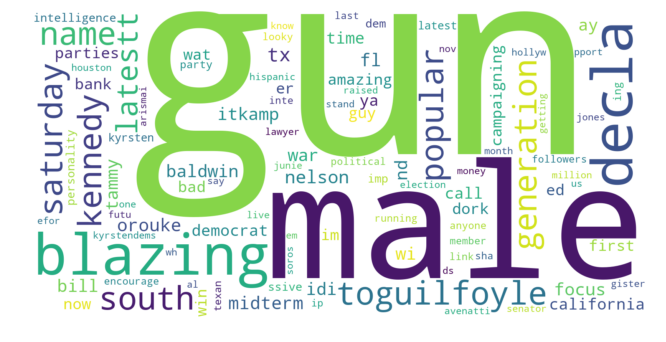

In [36]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

beto=df_raw[(df_raw.Beto==1) & (df_raw.Cruz==0)]['Text'].str.cat(sep='').replace("'","")
for i in ['nasty','ch','su','came','put','dont','od','vot','make','re','ee','need','go','beto','cruz','texas','ted','vote','man','senate','o rourke','want','rourke','orourke','he','o ','please','support','people','county','will','new']:
    beto=beto.replace(i," ")
wordcloud = WordCloud(width=1600, height=800,max_font_size=1000, max_words=100, background_color="white",collocations=False).generate(beto)
plt.figure(figsize=(11,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
beto

'hi, im junie b. jones t  b stands for     n ds your  e on nov .t  p tend hispanic     tried t fl  scene of drunk-driving crash after hitting someone.  s lied about hi.t  p tend hispanic     tried t fl  scene of drunk-driving crash after hitting someone.  s lied about himy d am   true. is honorable, nice, and has my  e for    .   dallas  you   know that. for  y, this   be t ir first time old enough t  e.you  , . wish i could  e for you. but, i am in ga. and  ing blue for stacey abrams.  et mout  t y    e for m  of t  same.   s ms t inspi  m . hopefully thatll push t  n dle .t  p tend hispanic     tried t fl  scene of drunk-driving crash after hitting someone.  s lied about hi.t  p tend hispanic     tried t fl  scene of drunk-driving crash after hitting someone.  s lied about hi.t  p tend hispanic     tried t fl  scene of drunk-driving crash after hitting someone.  s lied about hi.t  p tend hispanic     tried t fl  scene of drunk-driving crash after hitting someone.  s lied about hi.t  

## Ted Cruz WordCloud

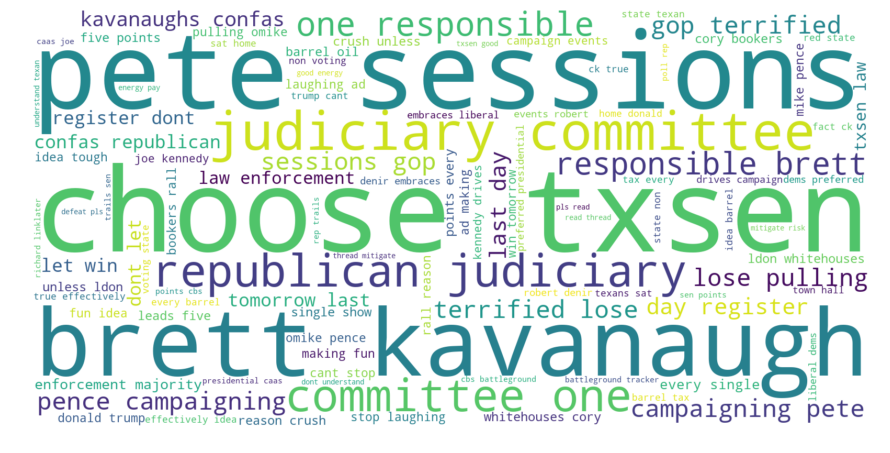

In [38]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text_cruz=df_raw[df_raw.Cruz==1]['Text'].str.cat(sep='').replace("'","")
for i in ['beto','cruz','texas','ted','vote','man','senate','o rourke','want','rourke','orourke','he','o ','please','support','people','county','will','new']:
    text_cruz=text_cruz.replace(i," ")
wordcloud = WordCloud(width=1600, height=800,max_font_size=1000, max_words=100, background_color="white").generate(text_cruz)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


# C. Positive Word lifts for both candidates

## Beto & Positive Sentiment

In [39]:
df_raw[(df_raw['Beto']==1) & (df_raw['Score']>0) & (df_raw['Cruz']==0)]['Text']

10        my dream came true. is honorable, nice, and ha...
18        you go,beto. wish i could vote for you. but, i...
25         they dont vote for more of the same. beto see...
54        also please remember to vote!!! this is so imp...
60         love languages: . acts of service: *votes for...
67         sure, cast your vote for beto if you want a r...
74         love languages: . acts of service: *votes for...
76                               good morning vote for beto
79         a vote for beto o' rourke is a vote for white...
83         a vote for beto o' rourke is a vote for white...
85        awesome day getting people registered to vote ...
173       awesome day getting people registered to vote ...
180       awesome day getting people registered to vote ...
185        sure, cast your vote for beto if you want a r...
190       vote for beto orourke this nov. th! the only c...
191       specific texans that are by far more privilege...
192       just attended a rally for beto

In [40]:
BPO=pd.DataFrame(df_raw[(df_raw['Beto']==1) & (df_raw['Score']>0) & (df_raw['Cruz']==0)]['Text'])
s=BPO['Text'].str.cat(sep=' ')
from string import punctuation
for p in punctuation:
    s =s.replace(p,'')
#ss=re.sub('[0-9]+','',s)
#words =re.findall('\w+',ss)
#words =re.findall('\w+',ss)
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in s if not w in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/richabathija/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
BPO['Text']

10        my dream came true. is honorable, nice, and ha...
18        you go,beto. wish i could vote for you. but, i...
25         they dont vote for more of the same. beto see...
54        also please remember to vote!!! this is so imp...
60         love languages: . acts of service: *votes for...
67         sure, cast your vote for beto if you want a r...
74         love languages: . acts of service: *votes for...
76                               good morning vote for beto
79         a vote for beto o' rourke is a vote for white...
83         a vote for beto o' rourke is a vote for white...
85        awesome day getting people registered to vote ...
173       awesome day getting people registered to vote ...
180       awesome day getting people registered to vote ...
185        sure, cast your vote for beto if you want a r...
190       vote for beto orourke this nov. th! the only c...
191       specific texans that are by far more privilege...
192       just attended a rally for beto

In [43]:
s

'my dream came true is honorable nice and has my vote for texas senate beto dallas  you gobeto wish i could vote for you but i am in ga and voting blue for stacey abrams votethemout   they dont vote for more of the same beto seems to inspire more hopefully thatll push the needle  also please remember to vote this is so important vote for beto nov  if you dont know where to vote pls as   love languages  acts of service votes for beto  quality time would you like to go vote for beto together  sure cast your vote for beto if you want a return to higher taxes heavy handed regulation and the fed gov  love languages  acts of service votes for beto  quality time would you like to go vote for beto together good morning vote for beto  a vote for beto o rourke is a vote for white privilege at the hands of the democratic party y  a vote for beto o rourke is a vote for white privilege at the hands of the democratic party y awesome day getting people registered to vote and talking to people about b

In [44]:
filtered_sentence

[' ',
 'r',
 'e',
 ' ',
 'c',
 'e',
 ' ',
 'r',
 'u',
 'e',
 ' ',
 ' ',
 'h',
 'n',
 'r',
 'b',
 'l',
 'e',
 ' ',
 'n',
 'c',
 'e',
 ' ',
 'n',
 ' ',
 'h',
 ' ',
 ' ',
 'v',
 'e',
 ' ',
 'f',
 'r',
 ' ',
 'e',
 'x',
 ' ',
 'e',
 'n',
 'e',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'l',
 ' ',
 ' ',
 'u',
 ' ',
 'g',
 'b',
 'e',
 ' ',
 'w',
 'h',
 ' ',
 ' ',
 'c',
 'u',
 'l',
 ' ',
 'v',
 'e',
 ' ',
 'f',
 'r',
 ' ',
 'u',
 ' ',
 'b',
 'u',
 ' ',
 ' ',
 ' ',
 'n',
 ' ',
 'g',
 ' ',
 'n',
 ' ',
 'v',
 'n',
 'g',
 ' ',
 'b',
 'l',
 'u',
 'e',
 ' ',
 'f',
 'r',
 ' ',
 'c',
 'e',
 ' ',
 'b',
 'r',
 ' ',
 'v',
 'e',
 'h',
 'e',
 'u',
 ' ',
 ' ',
 ' ',
 'h',
 'e',
 ' ',
 'n',
 ' ',
 'v',
 'e',
 ' ',
 'f',
 'r',
 ' ',
 'r',
 'e',
 ' ',
 'f',
 ' ',
 'h',
 'e',
 ' ',
 'e',
 ' ',
 'b',
 'e',
 ' ',
 'e',
 'e',
 ' ',
 ' ',
 'n',
 'p',
 'r',
 'e',
 ' ',
 'r',
 'e',
 ' ',
 'h',
 'p',
 'e',
 'f',
 'u',
 'l',
 'l',
 ' ',
 'h',
 'l',
 'l',
 ' ',
 'p',
 'u',
 'h',
 ' ',
 'h',
 'e',
 ' ',
 'n',
 'e',
 'e',
 'l',
 'e'

In [45]:
from collections import Counter 
BDF=pd.DataFrame.from_dict(Counter(filtered_sentence),orient='index').reset_index().sort_values(by=0, ascending=False)[:50]



In [46]:
BDF

index       0
0         318130
2      e  196586
6      n   91729
1      r   65165
4      u   56448
5      h   46615
8      l   44184
12     g   31173
7      b   26129
14     p   25054
10     f   23677
3      c   23404
13     w   16530
9      v   14401
15     k   11886
11     x    6137
18     z    4056
17     j     493
16     q     108

In [47]:
df_rawi=df_raw

In [48]:
df_rawi

ID      Screen_Name Followers Retweet     InReplyTo Favorite  \
1       8.17147E+17    PeterRosianul      8471      20          None        0   
3          33529092       SandraTXAS    142485      20          None       22   
4         731549497  heythereimabbey      1096   14160          None        0   
6       7.48839E+17      Writernan11       672    2632          None        0   
8        3490579037    JamesSaporito      1364    2632          None        0   
10          9872012       jeffmccord      1029       0          None        2   
11       1651880388      NeelyAshmun       102       1          None        0   
12         66101412    AngCivicAware       140       0  reynoldsr504        1   
13      1.02762E+18      LanceChisum       542       0          None        2   
14        505826307        tinavogl1      3432      99          None        0   
15         48011537       happycat35      8710      99          None        0   
17        134663382    Farmeropinion      3068      99          None        0   
18       2206614107        lacefire7       189       0          None        0   
19         15952589          mimi424      1149       0       tedcruz        1   
24         55700606         TRizld10      6361       5          None        0   
25        301862228         LillBump        31       0   reidepstein        0   
26      7.32991E+17   VictoriaPylant      1329    2632          None        0   
27       1452164484      dilemarocks      6769      99          None        0   
28       1563063560   ThorVonClensen      2103      99          None        0   
29      9.92154E+17       ConnieMM16       529    2632          None        0   
32      1.02031E+18   DalePuddicombe      4536      99          None        0   
34        330032418         loricree        92    2632          None        0   
35      7.64612E+17       FleuretonE      1449      99          None        0   
36      8.38798E+17      wwwillstand     60823      99          None        0   
37         24684457  clotilde_souper      1926    2632          None        0   
38      7.85965E+17       BornaZorna        74    2632          None        0   
40      8.94306E+17   auniqueaccount       233    2632          None        0   
43         54301428       Liberty717       198    2632          None        0   
44      7.32693E+17       SBradstrea     13256       1       tedcruz        1   
45       3518486666    GartrellLinda    128461    2632          None        0   
...             ...              ...       ...     ...           ...      ...   
218267  8.35324E+17     elli34064894       863     196          None        0   
218270   2840892718          JQTEXAS        38     196          None        0   
218271    229575933     Croatansound      1660     503          None        0   
218272    229575933     Croatansound      1660     196          None        0   
218273   1357633867    jeannemccoy17       119     503          None        0   
218274  8.31295E+17           rpd134        47     503          None        0   
218275    373383940           akoz53       440     503          None        0   
218277  7.10116E+17         EblingJr      1625     503          None        0   
218278  7.22359E+17     DMendoza1978        61     196          None        0   
218279  9.88675E+17    Jason43800365        57     503          None        0   
218280   1547845909        DebraDeyo       101     503          None        0   
218281  9.88675E+17    Jason43800365        57     196          None        0   
218283     74051536      ellawheeler        59     503          None        0   
218284   4028788342       WyverShago      7693     503          None        0   
218287   3180047730  HillaryCruz2016        33       0          None        0   
218288   2571373270   HunterRichkrad      1000     503          None        0   
218290   2571373270   HunterRichkrad      1000     196          None        0   
218291    129314386      RobinEnochs      8027  

In [49]:
list_good_words=['good','blazing','rain','save','energy','responsible']
def findword(s):
    beto = 0
    s = str(s).lower()
    txt1 = re.findall('good',s)
    if len(txt1) > 0:
        beto = 1
    return beto


#Change word from list of good words

df_rawi['good'] = df_rawi['Text'].map(findword)
prbeto = df_rawi['Beto'].mean()
prword = df_rawi['good'].mean()
betoword = df_rawi[df_rawi['Beto']==1]['good'].sum()
prbetoword = betoword/len(df_rawi)

lift_betoword = prbetoword /(prbeto*prword)
lift_betoword

1.6567779763580546

In [55]:
df_rawi.head(2)

ID    Screen_Name Followers Retweet InReplyTo Favorite Friends  \
1  8.17147E+17  PeterRosianul      8471      20      None        0    8580   
3     33529092     SandraTXAS    142485      20      None       22   44206   

  Listed            Location  \
1     31  AMERICA, THE GREAT   
3    433          Texas, USA   

                                                Text  Urban  Texas  Beto  \
1  millions of american christians, especially mi...      0      0     0   
3  millions of american christians, especially mi...      0      1     0   

   Cruz  Score  good  
1     0    0.0     0  
3     0    0.0     0

In [56]:
prbeto

0.5738287560581583

In [58]:
df_rawi.Beto.unique()

array([0, 1])

### Lift Score for positive words Beto
Good = 1.69 Blazing = 1.78 Rain = 1.71 Save=1.28 energy=1.05 responsible=0.0008

#### Ted & Positive Sentiment

In [59]:
TPO=pd.DataFrame(df_raw[(df_raw['Beto']==0) & (df_raw['Score']>0) & (df_raw['Cruz']==1)]['Text'])
s=TPO['Text'].str.cat(sep=' ')
from string import punctuation
for p in punctuation:
    s =s.replace(p,'')
s =re.sub('[0-9]+','',s)
words =re.findall('\w+',s)
words =re.findall('\w+',s)
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in words if not w in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/richabathija/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
filtered_sentence

['true',
 'choice',
 'tx',
 'american',
 'plan',
 'bring',
 'state',
 'back',
 'fro',
 'please',
 'dont',
 'act',
 'like',
 'new',
 'ted',
 'cruz',
 'notoriously',
 'antifemale',
 'hes',
 'allowi',
 'please',
 'dont',
 'act',
 'like',
 'new',
 'ted',
 'cruz',
 'notoriously',
 'antifemale',
 'hes',
 'allowi',
 'please',
 'dont',
 'act',
 'like',
 'new',
 'ted',
 'cruz',
 'notoriously',
 'antifemale',
 'hes',
 'thats',
 'great',
 'pic',
 'hope',
 'see',
 'white',
 'house',
 'ho',
 'theres',
 'new',
 'time',
 'lord',
 'town',
 'thankfully',
 'isnt',
 'rather',
 'jodie',
 'whittaker',
 'playing',
 'th',
 'doctor',
 'proper',
 'dec',
 'theres',
 'new',
 'time',
 'lord',
 'town',
 'thankfully',
 'isnt',
 'rather',
 'jodie',
 'whittaker',
 'playing',
 'th',
 'doctor',
 'p',
 'ok',
 'though',
 'trump',
 'slander',
 'kick',
 'dr',
 'ford',
 'ok',
 'trump',
 'supporters',
 'threaten',
 'kil',
 'republican',
 'senate',
 'judiciary',
 'committee',
 'ted',
 'cruz',
 'one',
 'people',
 'responsible'

In [62]:
from collections import Counter 
TDF=pd.DataFrame.from_dict(Counter(filtered_sentence),orient='index').reset_index().sort_values(by=0, ascending=False)[:80]

In [64]:
TDF.head()

index     0
15     cruz  7401
14      ted  6955
101   texas  6786
9    please  3649
68     vote  2798

In [65]:
list_good_words=['responsible','liberty','laughing','omg','energy','amazing','passion']
def findword(s):
    beto = 0
    s = str(s).lower()
    txt1 = re.findall('laughing',s)
    if len(txt1) > 0:
        beto = 1
    return beto


#Change word from list of good words

df_rawi['laughing'] = df_rawi['Text'].map(findword)
prcruz = df_rawi['Cruz'].mean()
prword = df_rawi['laughing'].mean()
cruzword = df_rawi[df_rawi['Cruz']==1]['laughing'].sum()
prcruzword = cruzword/len(df_rawi)

lift_cruzword = prcruzword /(prcruz*prword)
lift_cruzword

1.7248408764262457

### Lift Score for positive words Cruz
Good = 0.27 energy = 1.87 amazing = 0.757 omg=1.93 responsible=1.94 liberty=1.94 passion=1.87 laughing = 1.9457

## D. Split up of Positive, Negative & Neutral sentiment tweets

## Beto Split Up Overall

In [66]:
def bucketing(score):
    if score>0.05:
        return 'Positive'
    elif score<-0.05:
        return 'Negative'
    else:
        return 'Neutral'
df_rawB=df_raw[df_raw['Beto']==1]
df_rawB['ScoreBucket']=df_rawB['Score'].map(bucketing)
pd.DataFrame(df_rawB['ScoreBucket'].value_counts()/len(df_rawB)*100)

ScoreBucket
Positive    61.056780
Neutral     20.160621
Negative    18.782598

## Ted Split Up Overall

In [67]:
df_rawT=df_raw[df_raw['Cruz']==1]
df_rawT['ScoreBucket']=df_rawT['Score'].map(bucketing)
pd.DataFrame(df_rawT['ScoreBucket'].value_counts()/len(df_rawT)*100)


ScoreBucket
Positive    46.003578
Negative    30.891972
Neutral     23.104450

## Beto Split Up Texas

In [69]:
df_rawBT=df_rawB[df_rawB['Texas']==1]
df_rawBT['ScoreBucket']=df_rawBT['Score'].map(bucketing)
pd.DataFrame(df_rawBT['ScoreBucket'].value_counts()/len(df_rawBT)*100)

ScoreBucket
Positive    60.105079
Neutral     21.202569
Negative    18.692353

## Ted Split Up Texas

In [70]:
df_rawTT=df_rawT[df_rawT['Texas']==1]
df_rawTT['ScoreBucket']=df_rawT['Score'].map(bucketing)
pd.DataFrame(df_rawTT['ScoreBucket'].value_counts()/len(df_rawTT)*100)


ScoreBucket
Positive    47.324514
Negative    26.981289
Neutral     25.694196

## Beto Split Up Texas Urban

In [71]:
df_rawBU=df_rawB[df_rawB['Urban']==1]
df_rawBU['ScoreBucket']=df_rawBU['Score'].map(bucketing)
pd.DataFrame(df_rawBU['ScoreBucket'].value_counts()/len(df_rawBU)*100)


ScoreBucket
Positive    63.910761
Neutral     20.419948
Negative    15.669291

## Ted Split Up Texas Urban

In [72]:
df_rawTU=df_rawT[df_rawT['Urban']==1]
df_rawTU['ScoreBucket']=df_rawTU['Score'].map(bucketing)
pd.DataFrame(df_rawTU['ScoreBucket'].value_counts()/len(df_rawTU)*100)


ScoreBucket
Positive    47.015366
Negative    27.009456
Neutral     25.975177

## Beto Split Up Texas Rural

In [73]:
df_rawBR=df_rawB[df_rawB['Urban']==0]
df_rawBR['ScoreBucket']=df_rawBR['Score'].map(bucketing)
pd.DataFrame(df_rawBR['ScoreBucket'].value_counts()/len(df_rawBR)*100)


ScoreBucket
Positive    60.693526
Neutral     20.127614
Negative    19.178860

## Ted Split Up Texas Rural

In [74]:
df_rawTR=df_rawT[df_rawT['Urban']==0]
df_rawTR['ScoreBucket']=df_rawTR['Score'].map(bucketing)
pd.DataFrame(df_rawTR['ScoreBucket'].value_counts()/len(df_rawTR)*100)


ScoreBucket
Positive    45.892084
Negative    31.319809
Neutral     22.788108

## Graph Codes for sentiment spreads

Populating the interactive namespace from numpy and matplotlib
Nationwide Beto Sentiment:  0.18211036628736757


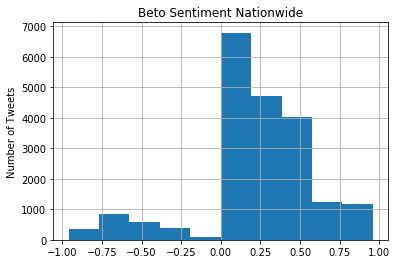

In [75]:
% pylab inline
#Beto Sentiment Nationwide
df_raw[(df_raw['Beto']==1) & (df_raw['Cruz']==0)]['Score'].hist(bins=10)
plt.title('Beto Sentiment Nationwide')
plt.ylabel('Number of Tweets')

senti_betonation = df_raw[df_raw['Beto']==1]['Score'].mean()
print('Nationwide Beto Sentiment: ', senti_betonation)

Nationwide Beto Sentiment:  0.09791414953215652


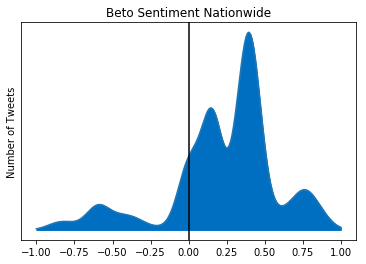

In [76]:
from scipy.stats import gaussian_kde
data = df_raw[(df_raw['Beto']==1) & (df_raw['Cruz']==0)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title('Beto Sentiment Nationwide')
plt.ylabel('Number of Tweets')

senti_beto = df_raw[df_raw['Cruz']==1]['Score'].mean()
print('Nationwide Beto Sentiment: ', senti_beto)

plt.fill_between(xs,density(xs),color='#006fc2')
plt.axvline(x=0, color='black')
plt.yticks([])
plt.grid(False)
plt.show()
##### For Cruz   #b20035

Texas Beto Sentiment:  0.17238468184471184


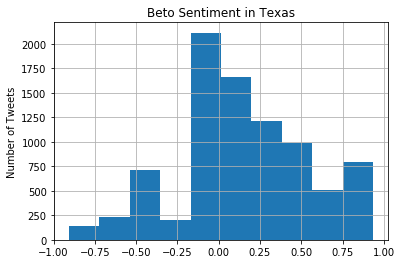

In [77]:
#Beto Sentiment in Texas
dftx[dftx['Beto']==1]['Score'].hist(bins=10)
plt.title('Beto Sentiment in Texas')
plt.ylabel('Number of Tweets')

senti_betotexas = dftx[dftx['Beto']==1]['Score'].mean()
print('Texas Beto Sentiment: ', senti_betotexas)

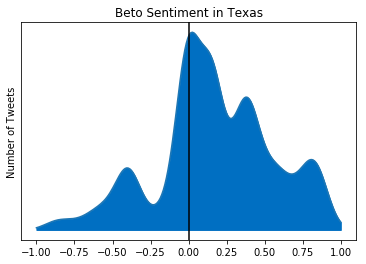

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
data = dftx[dftx['Beto']==1]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title('Beto Sentiment in Texas')
plt.ylabel('Number of Tweets')
plt.fill_between(xs,density(xs),color='#006fc2')
plt.axvline(x=0, color='black')
plt.yticks([])
plt.grid(False)
plt.show()
##### For Cruz   #b20035

Texas Urban Beto Sentiment:  0.17817173228346522


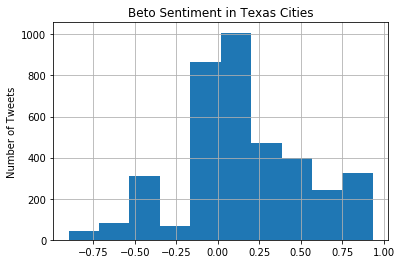

In [79]:
#Beto Sentiment in Texas Cities
dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==1)]['Score'].hist(bins=10)
plt.title('Beto Sentiment in Texas Cities')
plt.ylabel('Number of Tweets')

senti_betotxurban = dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==1)]['Score'].mean()
print('Texas Urban Beto Sentiment: ', senti_betotxurban)

Texas Urban Beto Sentiment:  0.17817173228346522


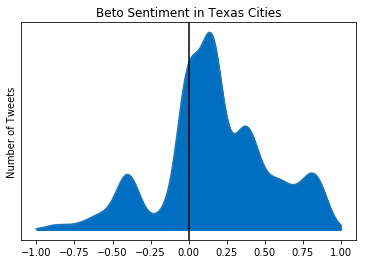

In [80]:
data = dftx[(dftx['Beto']==1) & (dftx['Urban']==1)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title('Beto Sentiment in Texas Cities')
plt.ylabel('Number of Tweets')

senti_betotxurban = dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==1)]['Score'].mean()
print('Texas Urban Beto Sentiment: ', senti_betotxurban)
plt.fill_between(xs,density(xs),color='#006fc2')
plt.axvline(x=0, color='black')
plt.grid(False)
plt.yticks([])
plt.show()
##### For Cruz   #b20035

Rural Texas Beto Sentiment:  0.16774773922187378


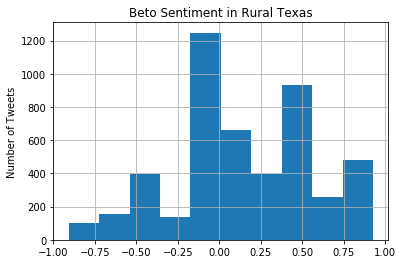

In [81]:
#Beto Sentiment in Rural Texas
dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==0)]['Score'].hist(bins=10)
plt.title('Beto Sentiment in Rural Texas')
plt.ylabel('Number of Tweets')

senti_betotxrural = dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==0)]['Score'].mean()
print('Rural Texas Beto Sentiment: ', senti_betotxrural)

Rural Texas Beto Sentiment:  0.16774773922187378


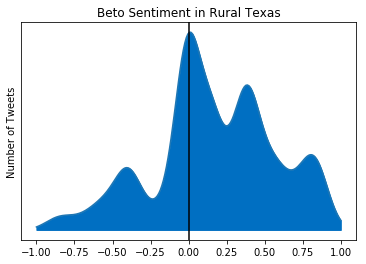

In [82]:
data = dftx[(dftx['Beto']==1) & (dftx['Urban']==0)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title('Beto Sentiment in Rural Texas')
plt.ylabel('Number of Tweets')

senti_betotxrural = dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==0)]['Score'].mean()
print('Rural Texas Beto Sentiment: ', senti_betotxrural)
plt.fill_between(xs,density(xs),color='#006fc2')
plt.axvline(x=0, color='black')
plt.yticks([])
plt.grid(False)
plt.show()
##### For Cruz   #b20035

## Cruz Sentiments in different regions

Nationwide Cruz Sentiment:  0.09791414953215652


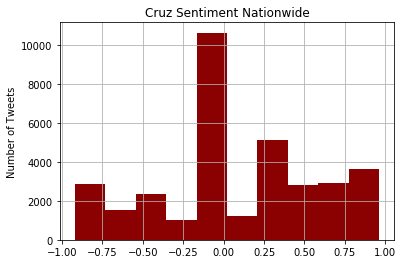

In [83]:
#Cruz Sentiment Nationwide
df_raw[df_raw['Cruz']==1]['Score'].hist(bins=10, color='darkred')
plt.title('Cruz Sentiment Nationwide')
plt.ylabel('Number of Tweets')

senti_cruznation = df_raw[df_raw['Cruz']==1]['Score'].mean()
print('Nationwide Cruz Sentiment: ', senti_cruznation)

Nationwide Cruz Sentiment:  0.09791414953215652


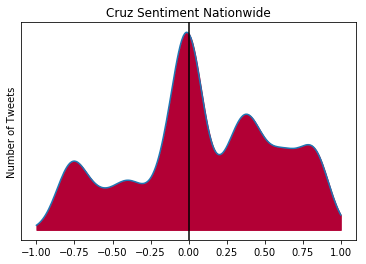

In [84]:
data = df_raw[df_raw['Cruz']==1]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title('Cruz Sentiment Nationwide')
plt.ylabel('Number of Tweets')

senti_cruznation = df_raw[df_raw['Cruz']==1]['Score'].mean()
print('Nationwide Cruz Sentiment: ', senti_cruznation)

plt.fill_between(xs,density(xs),color='#b20035')
plt.axvline(x=0, color='black')
plt.yticks([])
plt.grid(False)
plt.show()
##### For Cruz   #b20035

Texas Cruz Sentiment:  0.14088070551781726


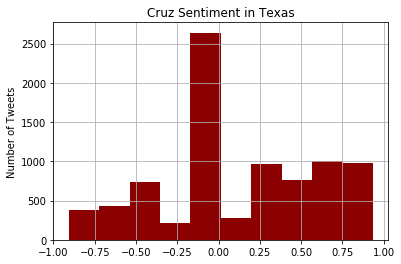

In [85]:
#Cruz Sentiment in Texas
dftx[dftx['Cruz']==1]['Score'].hist(bins=10, color='darkred')
plt.title('Cruz Sentiment in Texas')
plt.ylabel('Number of Tweets')

senti_cruztexas = dftx[dftx['Cruz']==1]['Score'].mean()
print('Texas Cruz Sentiment: ', senti_cruztexas)

Texas Cruz Sentiment:  0.14088070551781726


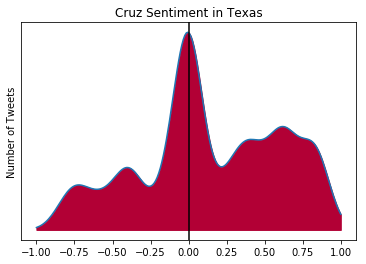

In [86]:
data = dftx[dftx['Cruz']==1]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title('Cruz Sentiment in Texas')
plt.ylabel('Number of Tweets')

senti_cruztexas = dftx[dftx['Cruz']==1]['Score'].mean()
print('Texas Cruz Sentiment: ', senti_cruztexas)

plt.fill_between(xs,density(xs),color='#b20035')
plt.axvline(x=0, color='black')
plt.yticks([])
plt.grid(False)
plt.show()
##### For Cruz   #b20035

Texas Urban Cruz Sentiment:  0.12991205673758713


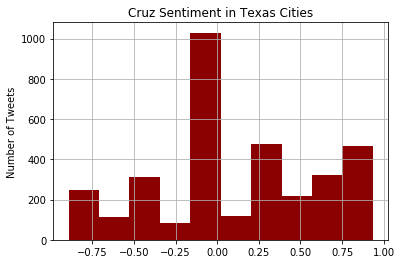

In [87]:
#Cruz Sentiment in Texas Cities
dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Score'].hist(bins=10, color='darkred')
plt.title('Cruz Sentiment in Texas Cities')
plt.ylabel('Number of Tweets')

senti_cruztxurban = dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Score'].mean()
print('Texas Urban Cruz Sentiment: ', senti_cruztxurban)

# print (dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Location'].value_counts())

Texas Urban Cruz Sentiment:  0.12991205673758713


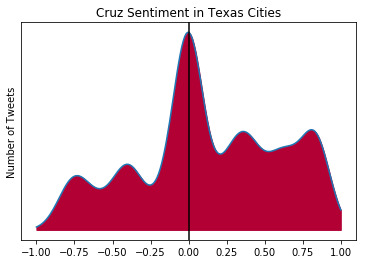

In [88]:
data = dftx[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title('Cruz Sentiment in Texas Cities')
plt.ylabel('Number of Tweets')

senti_cruztxurban = dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Score'].mean()
print('Texas Urban Cruz Sentiment: ', senti_cruztxurban)

plt.fill_between(xs,density(xs),color='#b20035')
plt.axvline(x=0, color='black')
plt.yticks([])
plt.grid(False)
plt.show()
##### For Cruz   #b20035

Rural Texas Cruz Sentiment:  0.1482939085280631


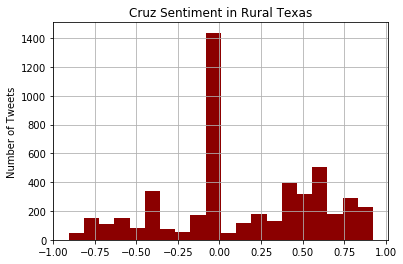

In [89]:
#Cruz Sentiment in Rural Texas
dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==0)]['Score'].hist(bins=20, color='darkred')
plt.title('Cruz Sentiment in Rural Texas')
plt.ylabel('Number of Tweets')

senti_cruztxrural = dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==0)]['Score'].mean()
print('Rural Texas Cruz Sentiment: ', senti_cruztxrural)

Rural Texas Cruz Sentiment:  0.1482939085280631


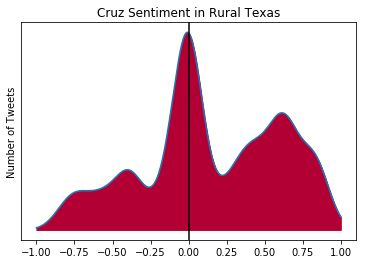

In [90]:
data = dftx[(dftx['Cruz']==1) & (dftx['Urban']==0)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title('Cruz Sentiment in Rural Texas')
plt.ylabel('Number of Tweets')

senti_cruztxrural = dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==0)]['Score'].mean()
print('Rural Texas Cruz Sentiment: ', senti_cruztxrural)
plt.fill_between(xs,density(xs),color='#b20035')
plt.axvline(x=0, color='black')
plt.grid(False)
plt.yticks([])
plt.show()
##### For Cruz   #b20035

## E. Lift in Texas (urban vs rural)

In [91]:
prcruz = dftx['Cruz'].mean()
prbeto = dftx['Beto'].mean()
prcity = dftx['Urban'].mean() #About 52% urban

In [92]:
#Lift Cruz and City
cruzcity = dftx[dftx['Cruz']==1]['Urban'].sum()
prcruzcity = cruzcity/len(dftx)

lift_cruzcity = prcruzcity/(prcruz*prcity)
lift_cruzcity

0.9287639029764461

In [93]:
#Lift Cruz and Rural
cruzrural = len(dftx[dftx['Cruz']==1]['Urban']) - cruzcity
prcruzrural = cruzrural/len(dftx)

lift_cruzrural = prcruzrural/(prcruz*(1-prcity))
lift_cruzrural


1.0546720008797401

In [94]:
#Lift Beto and City
betocity = dftx[dftx['Beto']==1]['Urban'].sum()
prbetocity = betocity/len(dftx)

lift_betocity = prbetocity/(prbeto*prcity)
lift_betocity

1.0244394705425042

In [95]:
#Lift Beto and Rural
betorural = len(dftx[dftx['Beto']==1]['Urban']) - betocity
prbetorural = betorural/len(dftx)

lift_betorural = prbetorural/(prbeto*(1-prcity))
lift_betorural

0.9812432908198441

## F. Beto & Ted Cruz Topics (Topic Modelling)

### Ted Cruz Topics

In [96]:
stemmer = SnowballStemmer('english')
# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [97]:
print (len(dftx))
cruztweets = dftx[dftx['Cruz']==1]['Text']
print (len(cruztweets))
cruzwords = cruztweets.map(preprocess)

14412
8391


In [98]:
cruzwords

13        [francis, liar, rourke, raised, property, time...
15        [vote, cruz, veto, beto, interested, fast, tra...
24        [yall, wanna, vote, beto, damn, lmaoooo, didnt...
73        [friend, redtiderick, working, destroy, future...
78                   [betos, talks, republicans, democrats]
87        [vote, cruz, veto, beto, interested, fast, tra...
91        [vote, cruz, veto, beto, interested, fast, tra...
96        [voting, beto, voting, democrat, supports, dem...
97        [come, texas, know, better, vote, choosecruz, ...
152       [cruz, texas, vote, beto, orourke, clean, dirt...
153                        [fuck, cruz, vote, beto, thanks]
158       [come, texas, know, better, vote, choosecruz, ...
184                      [hannity, cruz, liars, vote, beto]
186       [texas, vote, november, remember, supports, ra...
188       [vote, cruz, veto, beto, interested, fast, tra...
196                            [polls, posted, hours, vote]
232       [vote, beto, democrat, sociali

In [99]:
# checking lda topics for 1 tweet
cruz_dt = gensim.corpora.Dictionary(cruzwords)
cruz_bow = [cruz_dt.doc2bow(tweet) for tweet in cruzwords]   # doc2bow convert document to bag of words
bow_tweet_1 = cruz_bow[1]

#Print sample breakdown
for i in range(len(bow_tweet_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_tweet_1[i][0], 
                                                     cruz_dt[bow_tweet_1[i][0]], 
                                                     bow_tweet_1[i][1]))

Word 11 ("beto") appears 1 time.
Word 12 ("citizenship") appears 1 time.
Word 13 ("cruz") appears 2 time.
Word 14 ("dreamer") appears 1 time.
Word 15 ("fast") appears 1 time.
Word 16 ("interested") appears 1 time.
Word 17 ("track") appears 1 time.
Word 18 ("veto") appears 1 time.
Word 19 ("vote") appears 1 time.
Word 20 ("wall") appears 1 time.


In [100]:
cruz_tfidf = models.TfidfModel(cruz_bow)
cruz_model = cruz_tfidf[cruz_bow]
lda_cruz = gensim.models.LdaMulticore(cruz_model, num_topics=5, id2word=cruz_dt, passes=2, workers=4)

In [101]:
df_cruztopics = pd.DataFrame(lda_cruz.print_topics(5))
df_cruztopics

0                                                  1
0  0  0.044*"vote" + 0.028*"register" + 0.027*"tomor...
1  1  0.019*"energy" + 0.018*"choose" + 0.018*"txsen...
2  2  0.028*"beto" + 0.027*"county" + 0.024*"points"...
3  3  0.018*"senate" + 0.017*"term" + 0.016*"year" +...
4  4  0.040*"state" + 0.028*"voted" + 0.025*"trump" ...

In [102]:
for index, score in sorted(lda_cruz[bow_tweet_1], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_cruz.print_topic(index, 2)))
    


Score: 0.9320666790008545	 
Topic: 0.040*"state" + 0.028*"voted"

Score: 0.017194261774420738	 
Topic: 0.044*"vote" + 0.028*"register"

Score: 0.016936257481575012	 
Topic: 0.028*"beto" + 0.027*"county"

Score: 0.01691420003771782	 
Topic: 0.019*"energy" + 0.018*"choose"

Score: 0.016888601705431938	 
Topic: 0.018*"senate" + 0.017*"term"


In [103]:
#lda  topics on all the tweets
cruztweets_lda_results=[]
for i in range(len(cruz_bow)):
    cruztweets_lda=(sorted(lda_cruz[cruz_bow[i]], key=lambda tup: -1*tup[1])[0][0])
    cruztweets_lda_results.append(cruztweets_lda)
    #print (sorted(lda_cruz[cruz_bow[i]], key=lambda tup: -1*tup[1])[0][0])
       # print("\nScore: {}\t \nTopic: {}".format(score, lda_cruz.print_topic(1, 10)))
cruztweets_lda_series=pd.Series(cruztweets_lda_results,index=cruztweets.index.values)

In [104]:
words_dic3=[]
for i in range(len(cruz_dt)):
    words_dic2=cruz_dt[cruz_dt.keys()[i]]
    words_dic3.append(words_dic2)

In [105]:
#lda loadings of cruz tweets
lda_cruz_df=pd.DataFrame(lda_cruz.get_topics().T,columns=[0,1,2,3,4])
lda_cruz_df['words_dic']=pd.Series(words_dic3)
lda_cruz_df.set_index('words_dic',inplace=True)
lda_cruz_df.to_csv('lda_cruz.csv', mode='a')
lda_cruz_df[:5]

0         1         2         3         4
words_dic                                                  
district   0.000308  0.000133  0.000030  0.000175  0.000177
francis    0.000247  0.000180  0.000031  0.000985  0.000529
liar       0.000168  0.000137  0.000137  0.000060  0.000131
property   0.000107  0.000045  0.000030  0.000060  0.000046
raise      0.000929  0.000106  0.000066  0.000402  0.000161

### Beto O'Rourke Topics

In [106]:
betotweets = dftx[dftx['Beto']==1]['Text']
betowords = betotweets.map(preprocess)

In [107]:
beto_dt = gensim.corpora.Dictionary(betowords)
beto_bow = [beto_dt.doc2bow(tweet) for tweet in betowords]

beto_tfidf = models.TfidfModel(beto_bow)
beto_model = beto_tfidf[beto_bow]
lda_beto = gensim.models.LdaMulticore(beto_model, num_topics=5, id2word=beto_dt, passes=2, workers=4)

In [108]:
words_dic=[]
for i in range(len(beto_dt)):
    words_dic1=beto_dt[beto_dt.keys()[i]]
    words_dic.append(words_dic1)

In [109]:
#lda  topics on all the beto tweets
betotweets_lda_results=[]
for i in range(len(beto_bow)):
    betotweets_lda=(sorted(lda_beto[beto_bow[i]], key=lambda tup: -1*tup[1])[0][0])
    betotweets_lda_results.append(betotweets_lda)
    #print (sorted(lda_cruz[cruz_bow[i]], key=lambda tup: -1*tup[1])[0][0])
       # print("\nScore: {}\t \nTopic: {}".format(score, lda_cruz.print_topic(1, 10)))
betotweets_lda_series=pd.Series(betotweets_lda_results,index=betotweets.index.values)

In [111]:
#lda loadings of beto tweets
lda_beto_df=pd.DataFrame(lda_beto.get_topics().T,columns=[0,1,2,3,4])
lda_beto_df['words_dic']=pd.Series(words_dic)
lda_beto_df.set_index('words_dic',inplace=True)
lda_beto_df.to_csv('lda_beto_df.csv', mode='a')
lda_beto_df[:5]

0         1         2         3         4
words_dic                                                  
beto       0.010892  0.006233  0.007808  0.005469  0.004931
jones      0.007162  0.000525  0.000071  0.000075  0.001725
junie      0.007180  0.000515  0.000059  0.000072  0.001719
needs      0.007806  0.000777  0.000489  0.000441  0.001970
orourke    0.006407  0.021647  0.004589  0.006362  0.004869

***After careful analysis of words' loadings, we labelled the topics as following for the indiviudal candidates***

***Candidate - Ted Cruz***

* Topic 0:Corporations
* Topic 1:Race
* Topic 2:Immigration
* Topic 3:Civil Rights
* Topic 4:Guns & Oil

***Candidate - Beto***

* Topic 0:Civil Rights
* Topic 1:Education
* Topic 2:Crime
* Topic 3:Democrat
* Topic 4:Speeches



## Consolidating lda topics and the original dataframe

In [112]:
betotweets_lda_df=pd.DataFrame(betotweets_lda_series,columns=['beto_lda_topic'])
cruztweets_lda_df=pd.DataFrame(cruztweets_lda_series,columns=['cruz_lda_topic'])
print (len(cruztweets_lda_df))
print (len(betotweets_lda_df))

8391
8565


In [113]:
dftx1=dftx.merge(betotweets_lda_df,how='left',right_index=True,left_index=True)
dftx1=dftx1.merge(cruztweets_lda_df,how='left',right_index=True,left_index=True)
len(dftx1)

14412

In [121]:
# Average sentiment analysis for the topics - cruz tweets 
for i in [0,1,2,3,4]:
    print ("Average sentiment score for topic " +  str(i)+": "+ str(dftx1[dftx1['cruz_lda_topic']==i]['Score'].mean()))
    
    

Average sentiment score for topic 0: 0.034446381093057546
Average sentiment score for topic 1: 0.25146252307692424
Average sentiment score for topic 2: 0.24429073756432995
Average sentiment score for topic 3: 0.2199920915712812
Average sentiment score for topic 4: -0.05378335644937597


In [124]:
# Average sentiment analysis for the topics - beto tweets 
for i in [0,1,2,3,4]:
    print ("Average sentiment score for topic " +  str(i)+": "+ str(dftx1[dftx1['beto_lda_topic']==i]['Score'].mean()))
    
    

Average sentiment score for topic 0: 0.2491670873786369
Average sentiment score for topic 1: 0.15196014492753107
Average sentiment score for topic 2: 0.08688007662835186
Average sentiment score for topic 3: 0.014115251442704058
Average sentiment score for topic 4: 0.24000882557331454


## Conclusions
Sentiment towards Beto is generally more positive in all regions

Ted Cruz is talked about more outside of large cities

Topics associated with each follow party lines

Ted Cruz is associated with people more than issues

The race is much closer in rural areas

## Recommendations
Focus on issues that rural Texans care about